In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
FinalGEO=pd.read_csv('/Users/wenvennn/Desktop/Final_GEOdataSci/accident_sample_bkk-main/event2019_BKK.csv')

In [3]:
FinalGEO

,title,latitude,longitude
0,อุบัติเหตุ ถนนรัชดาภิเษก ขาเข้า,13.756988,100.565255
1,อุบัติเหตุ ถนนทางรถไฟเก่าสายปากน้ำ,13.717649,100.565232
2,อุบัติเหตุ ถนนเจริญกรุง ขาเข้า,13.728361,100.515878
3,อุบัติเหตุ กรุงเทพมหานคร,13.753568,100.580294
4,อุบัติเหตุ แยกคลองเตย,13.720805,100.557668
...,...,...,...
3061,อุบัติเหตุ ถนนเพชรบุรี,13.749695,100.548232
3062,อุบัติเหตุ ห้วยขวาง กรุงเทพมหานคร,13.753643,100.580295
3063,อุบัติเหตุ ห้วยขวาง กรุงเทพมหานคร,13.753630,100.580293
3064,อุบัติเหตุ เจริญรัถ 8 (ซอยอยู่ดี),13.704420,100.516291


In [4]:
import folium as fo
longitude =  100.5538272857666
latitude = 13.734465925243732
station_map = fo.Map(
                location = [latitude, longitude], 
                zoom_start = 14)
latitudes = list(FinalGEO.latitude)
longitudes = list(FinalGEO.longitude)
labels = list(FinalGEO.title)

for lat, lng, label in zip(latitudes, longitudes, labels):
    fo.Circle(
      location = [lat, lng],
      radius = 1,
      color = 'Blue' 
     ).add_to(station_map)
station_map

In [5]:
from sklearn.cluster import KMeans

In [6]:
n_clusters=9

In [7]:
KPoint = np.array(FinalGEO[['latitude','longitude']].values.tolist())
KPoint

array([[ 13.75698822, 100.56525484],
       [ 13.71764933, 100.56523204],
       [ 13.72836112, 100.51587805],
       ...,
       [ 13.7536295 , 100.5802926 ],
       [ 13.70441981, 100.51629111],
       [ 13.74915145, 100.51672965]])

In [8]:
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(KPoint)

KMeans(n_clusters=9)

In [9]:
cluster_labels = kmeans.labels_
SS = kmeans.inertia_ 

In [10]:
SS

0.25769198323346

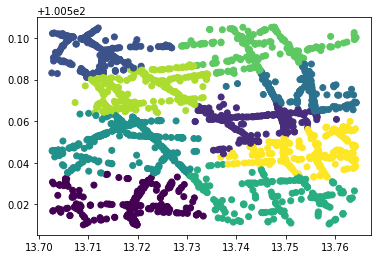

In [11]:
plt.scatter(FinalGEO['latitude'],FinalGEO['longitude'], c=cluster_labels)

In [12]:
station_map

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [14]:
silhouette_score(KPoint, cluster_labels)

0.42918646988716685